# **TD 08: Interface Graphique**

## **Partie 01: Démarrage**

In [1]:
import pandas as pd
import os
from Modules.corpus import Corpus, compare, plot_wordcloud
from Modules.document import Document
from Modules.searchEngine import SearchEngine

In [2]:
df = pd.read_csv("discours_US.csv", sep='\t', quotechar='"')
print(df.columns)

#Vérification de la distirbution des auteurs des discours
print(df['speaker'].value_counts())

Index(['speaker', 'text', 'date', 'descr', 'link'], dtype='object')
speaker
CLINTON    93
TRUMP      71
Name: count, dtype: int64


In [3]:
#Création d'une instance de la classe Corpus 
discours=Corpus("Discours")

In [4]:
#Découpage des discours en phrases et ajout des phrases au corpus
df_phrases=pd.DataFrame(columns=['speaker','text','date','descr','link'])
#Pour chaque discours dans notre df
for i in range(len(df)):
    #On découpe le discours en phrases
    phrases=df['text'][i].split('.')
    #Pour chaque phrase dans les phrases découpées
    for phrase in phrases:
        #On ajoute la phrase à notre nouvelle df
        temp_df = pd.DataFrame([{
            'speaker': df['speaker'][i],
            'text': phrase.strip(),  # Utilisation de strip() pour enlever les espaces en début et fin de phrase
            'date': df['date'][i],
            'descr': df['descr'][i],
            'link': df['link'][i]
        }])
        # On ajoute la phrase à notre nouvelle df en utilisant pd.concat
        df_phrases = pd.concat([df_phrases, temp_df], ignore_index=True)

print(df_phrases.shape)

(33268, 5)


In [5]:
Phrases = []
for i in range(len(df_phrases)):
    #On crée un document à partir de chaque ligne de notre df_phrases
    doc = Document(df_phrases['descr'][i], df_phrases['speaker'][i], df_phrases['date'][i], df_phrases['link'][i], df_phrases['text'][i])
    #On ajoute le document à notre collection de documents
    Phrases.append(doc)

print(len(Phrases))

33268


In [6]:
print(discours)

Nom du corpus : Discours
Nombre d'auteurs : 0
Nombre de documents : 0


In [7]:
# Construction du corpus 
for doc in Phrases:
    discours.add(doc)

In [8]:
discours.search("war")

True

In [9]:
discours.concorde("America great", 10)

,Contexte gauche,Expression trouvée,Contexte droit
0,ever make,America great,again The
1,will make,America great,again Tha
2,ways made,America great,And I bel
3,d to make,America great,again I w
4,g to make,America great,again I'm
5,s to make,America great,again Wel
6,n to make,America great,"again, I"
7,g to make,America great,again We'
8,g to make,America great,again But
9,g to make,America great,again We'


## **Partie 02: Moteur de recherche**

In [10]:
# Création d'une instance de la classe SearchEngine
moteur=SearchEngine(discours)

In [11]:
# Test de la méthode search
moteur.search("war", 10)

Recherche des documents: 100%|██████████| 10/10 [00:00<00:00, 766.95it/s]


,titre,auteur,date,url,similarité
0,"Remarks in San Diego, California",CLINTON,"June 2, 2016",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.500000
1,"Remarks on Obamacare in Valley Forge, Pennsylv...",TRUMP,"November 1, 2016",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.447214
2,Debate between Trump and Clinton,TRUMP,"September 26, 2016",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.447214
3,Remarks at a Rally at the University of North ...,TRUMP,"August 9, 2016",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.408248
4,Debate between Trump and Clinton,TRUMP,"September 26, 2016",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.408248
5,Remarks at the Cleveland Arts and Social Scien...,TRUMP,"September 8, 2016",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.408248
6,Remarks at McGlohon Theatre at Spirit Square i...,TRUMP,"October 26, 2016",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.400000
7,Debate between Trump and Clinton,CLINTON,"October 09, 2016",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.377964
8,Remarks at a Rally at the University of North ...,TRUMP,"August 9, 2016",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.377964
9,Remarks at the University of North Carolina in...,CLINTON,"September 15, 2016",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.377964


In [12]:
moteur.search("America great again",10)

Recherche des documents: 100%|██████████| 10/10 [00:00<00:00, 598.27it/s]


,titre,auteur,date,url,similarité
0,"Remarks to the American Legion in Cincinnati, ...",TRUMP,"September 1, 2016",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.707107
1,Remarks at a Rally at the James L. Knight Cent...,TRUMP,"September 16, 2016",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.707107
2,Remarks to the Economic Club of New York at th...,TRUMP,"September 15, 2016",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.707107
3,Remarks at the US Cellular Center in Asheville...,TRUMP,"September 12, 2016",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.707107
4,Remarks at Seven Flags Event Center in Des Moi...,TRUMP,"September 13, 2016",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.707107
5,Remarks at a Rally at the Greenville Conventio...,TRUMP,"September 6, 2016",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.707107
6,Remarks at a Rally at Canton Memorial Civic Ce...,TRUMP,"September 14, 2016",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.707107
7,Remarks at Trump SoHo in New York City,TRUMP,"June 22, 2016",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.700140
8,"Remarks at the XFinity Arena in Everett, Washi...",TRUMP,"August 30, 2016",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.654654
9,Debate between Trump and Clinton,TRUMP,"September 26, 2016",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.654654


### **Partie 03: Interface graphique**

In [13]:
#Création des objets graphiques simples: Label, Text, et IntSlider
import ipywidgets as widgets
from ipywidgets import Layout
from IPython.display import display, HTML


#Création du Label qui affichera le titre qui est "Moteur de recherche"
label = widgets.Label(value="Moteur de recherche", layout=Layout(width='auto'))

# Utilisation de HBox pour centrer le Label
centered_label = widgets.HBox([label], layout=Layout(justify_content='center'))

#Création du Text qui permettra à l'utilisateur de saisir les mots clés à rechercher
text = widgets.Text(
    value='',
    placeholder='Saisir les mots clés',
    description='Mots clés:',
    disabled=False
)

centraled_text = widgets.HBox([text], layout=Layout(justify_content='center'))

#Création du IntSlider qui permettra à l'utilisateur de choisir le nombre de résultats à afficher
slider = widgets.IntSlider(
    value=7,
    min=1,
    max=10,
    step=1,
    description='Nombre d articles à extraire:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    layout=Layout(width='50%')
)


slider.style.description_width = 'initial'

centraled_slider = widgets.HBox([slider], layout=Layout(justify_content='center'))


#Création du buton de recherche qui va permettre de lancer la recherche
button = widgets.Button(description="Rechercher", layout=Layout(width='auto'))

cenraled_button = widgets.HBox([button], layout=Layout(justify_content='center'))


def on_button_clicked(b):
    # Access the variable b
    print(f"Button clicked: {b}")
    
    # Récupérer les mots clés et le nombre de résultats à afficher
    keywords = text.value
    num_results = slider.value
    # Effectuer la recherche
    results = moteur.search(keywords, num_results)
    
    # Afficher les résultats
    display(HTML("<h3>Résultats de la recherche :</h3>"))
    for index, result in results.iterrows():
        display(HTML(f"<p><b>Titre :</b> {result['titre']}<br>"
                     f"<b>Auteur :</b> {result['auteur']}<br>"
                     f"<b>Date :</b> {result['date']}<br>"
                     f"<b>URL :</b> <a href='{result['url']}'>{result['url']}</a></p>"))

# Associer la fonction au bouton
button.on_click(on_button_clicked)

# Afficher l'interface graphique
display(widgets.VBox([centered_label, centraled_text, centraled_slider, cenraled_button]))


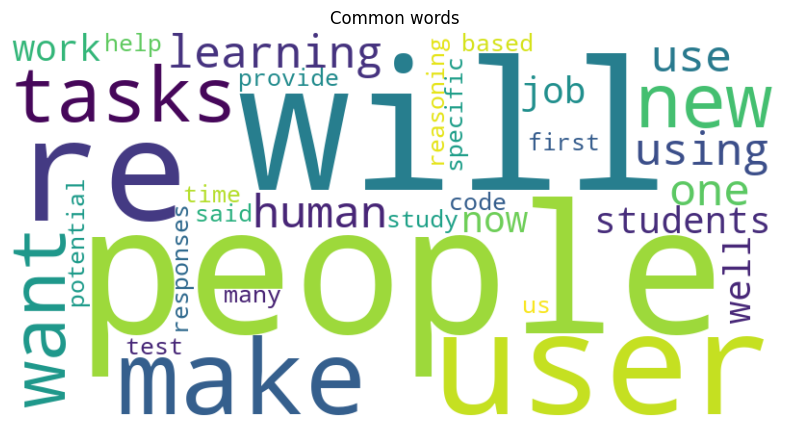

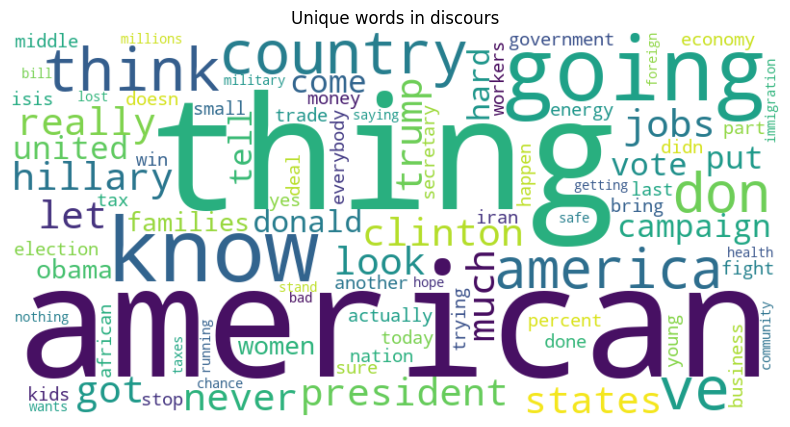

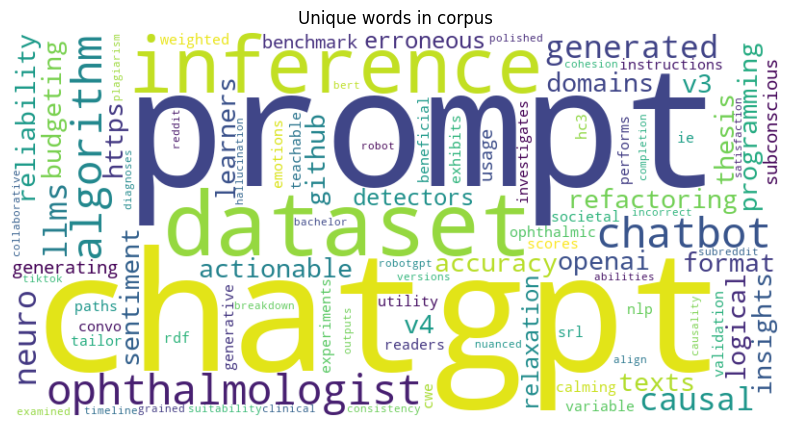

In [14]:
# Comparaison de deux corpus
corpus = Corpus.load(os.path.join("Data", "corpus.pkl"))

common_words, unique_words_corpus1, unique_words_corpus2 = compare(discours, corpus)

plot_wordcloud(common_words, "Common words","Outputs")
plot_wordcloud(unique_words_corpus1, "Unique words in discours","Outputs")
plot_wordcloud(unique_words_corpus2, "Unique words in corpus","Outputs")

